# task 1.1: Lloyd Max algorithm

In [5]:
import scipy.misc as misc
import numpy as np
import matplotlib.pyplot as plt


#read image
def readImage(filename):
    f = misc.imread(filename, flatten=True).astype("float")
    return f

#write image
def writeImage(data,filename):
    misc.toimage(data,cmin=0,cmax=255).save(filename)



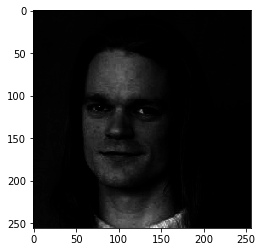

In [9]:
image = readImage('images/bauckhage-gamma-2.png')
# result = LloydAlgorithm(image, levels=8)

plt.imshow(image, cmap='gray')
# plt.imshow(result,cmap='gray')
plt.show()

## DUMMY CODE

In [19]:
imgData = image
levels = 2

totalIterations = 100
threshold = 0.01

#first calculate the intensity histogram
print (imgData)
print (imgData.shape)
print (np.max(imgData), np.min(imgData))

histogram = np.histogram(imgData, bins=np.arange(257))[0]

print (histogram)
print (histogram.shape)
print (max(histogram), min(histogram))

probs = histogram/histogram.sum()
print (probs)
print (probs.shape)
print (max(probs), min(probs))


[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 4.  4.  4. ...,  0.  0.  0.]
 [ 3.  4.  4. ...,  0.  0.  0.]
 [ 3.  3.  4. ...,  0.  0.  0.]]
(256, 256)
195.0 0.0
[23756 10106  7707  5054  2241   618   671   511   608   369   522   343
   362   434   412   234   425   201   465   228   555   245   294   300
   621   273   267   278   285   280   274   278   248   270   230   264
     0   258   286   309   270     0   256   273     0   254   239   242
     0   221   205     0   236     0   219   259     0   227     0   243
     0   172     0   167   146     0   151     0   115     0    92     0
    71     0     0    56     0    44     0    39     0    23     0     0
    17     0    16     0     0    17     0     9     0     0    13     0
     9     0     0    11     0     0    13     0     0    12     0     0
     7     0     0    10     0     0     8     0     0     7     0     0
     9     0     0     9     0     0    10     0 

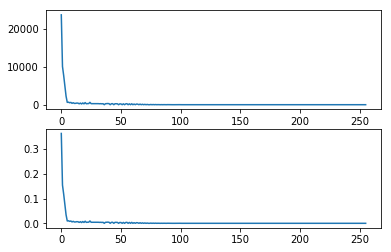

In [21]:
plt.figure(1)
plt.subplot(211)
plt.plot(histogram)
plt.subplot(212)
plt.plot(probs)

plt.show()

In [22]:
#initialize the boundaries and quantization points
boundaries = np.arange(levels+1) * 256/levels
pointsBv = (np.arange(levels) * 256/levels) + 256/(2*levels)

print (boundaries)
print (pointsBv)

[   0.  128.  256.]
[  64.  192.]


In [25]:
for i in range(1, levels):
    print (i)

1


## Lloyd Algorithm function

In [62]:
def LloydAlgorithm(imgData, levels=2):
    """Implement the Lloyd Max quantization algorithm"""
    totalIterations = 1000
    threshold = 0.01

    # calculate the intensity histogram
    histogram = np.histogram(imgData, bins=np.arange(257))[0]

    # calculate PDF
    probs = histogram/histogram.sum()

    #initialize the boundaries and quantization points
    boundaries = np.arange(levels+1) * 256/levels
    pointsBv = (np.arange(levels) * 256/levels) + 256/(2*levels)
    print (boundaries)
    print (pointsBv)
    print ("")
    #iterate the equations
    error = 0.0
    for i in range(levels):
        currentBoundary = boundaries[i]
        nextBoundary = boundaries[i+1]
        for j in range(int(currentBoundary),int(nextBoundary)):
            error += (j-pointsBv[i])*(j-pointsBv[i])*probs[j]
    error1 = error
    iterationCount = 0
    stopFlag = False
    while(iterationCount<totalIterations and stopFlag == False):
        iterationCount+=1
        #update boundaries
        for i in range(1, levels):
            boundaries[i] = (pointsBv[i]+pointsBv[i-1])/2.0
#         print(boundaries)
        #update points
        for i in range(levels-1):
            numerator = 0.0
            denominator = 0.0
            currentBoundary = boundaries[i]
            nextBoundary = boundaries[i+1]

            for j in range(int(currentBoundary),int(nextBoundary)):
                if(j>probs.size):
                    break
                numerator += j*probs[j]
                denominator += probs[j]
            if(numerator==0 or denominator==0):
                pointsBv[i] = 0.0
            else:
                pointsBv[i] = float(numerator)/float(denominator)
#         print (pointsBv)

        # compute error
        error = error1
        error1 = 0.0
        for i in range(levels):
            currentBoundary = boundaries[i]
            nextBoundary = boundaries[i+1]
            for j in range(int(currentBoundary),int(nextBoundary)):
                error1 += (j-pointsBv[i])*(j-pointsBv[i])*probs[j]
        if (error1 - error > threshold):
            stopFlag = True


    rows, cols = imgData.shape
    newImgData = np.ndarray(shape=(rows, cols))
    for i in range(rows):
        for j in range(cols):
            for k in range(levels):
                if(imgData[i,j]>=boundaries[k] and imgData[i,j]<boundaries[k+1]):
                    break
            newImgData[i,j] = pointsBv[k]
    print(boundaries)
    print(pointsBv)
    print(iterationCount)
    print(error)
    return newImgData

In [63]:
newImgdata = LloydAlgorithm(image, 8)

[   0.   32.   64.   96.  128.  160.  192.  224.  256.]
[  16.   48.   80.  112.  144.  176.  208.  240.]

[   0.            5.86104247   17.75559837   33.24585203   51.05089956
   76.29409545  116.41875423  190.35714286  256.        ]
[   1.0160036     9.79034307   24.11292223   40.98490355   60.1272052
   88.73790323  137.14772727  240.        ]
23
7.36446311485


In [55]:
print (newImgdata.shape)

(256, 256)
